In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# 파일의 경로 설정

import os

HOME = os.getcwd()

trainPath = os.path.join(HOME,'data','train.csv')
testPath = os.path.join(HOME,'data','test.csv')


'c:\\Users\\ailee\\github\\sklearn-est--\\seoulBike\\data\\test.csv'

### 데이터 불러오기

In [11]:
train_df = pd.read_csv(trainPath)
test_df = pd.read_csv(testPath)
train_df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


### 컬럼 특성

* id 고유 id
* **hour** : 시간
* **temperature** : 기온
* **precipitation** : 비가 오지 않았으면 0, 비가 오면 1
* **windspeed** : 풍속(평균)
* **humidity** : 습도
* **visibility** : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* **ozone** : 오존
* **pm10** : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* **pm2.5** : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* **count** : 시간에 따른 따릉이 대여 수

### 컬럼 특성

| 컬럼명 | 설명 |
| :--- | :--- |
| **id** | 고유 id |
| **hour** | 시간 |
| **hour_bef_temperature** | 1시간 전 기온 |
| **hour_bef_precipitation** | 1시간 전 비가 오지 않았으면 0, 비가 오면 1 |
| **hour_bef_windspeed** | 1시간 전 풍속(평균) |
| **hour_bef_humidity** | 1시간 전 습도 |
| **hour_bef_visibility** | 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미) |
| **hour_bef_ozone** | 1시간 전 오존 |
| **hour_bef_pm10** | 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지) |
| **hour_bef_pm2.5** | 1시간 전  초미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지) |
| **count** | 시간에 따른 따릉이 대여 수 |

In [25]:
# train_df의 컬럼명을 변경
train_df.columns = ['id', 'hour', 'temperature', 'precipitation',
       'windspeed', 'humidity', 'visibility',
       'ozone', 'pm10', 'pm2.5', 'count']
train_df.columns

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [22]:
train_df['id'].describe()

count    1459.000000
mean     1105.914325
std       631.338681
min         3.000000
25%       555.500000
50%      1115.000000
75%      1651.000000
max      2179.000000
Name: id, dtype: float64

In [18]:
#train_df['hour'].unique()
sorted_hours = sorted(train_df['hour'].unique())
print(sorted_hours)
print(train_df['hour'].nunique())

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23)]
24


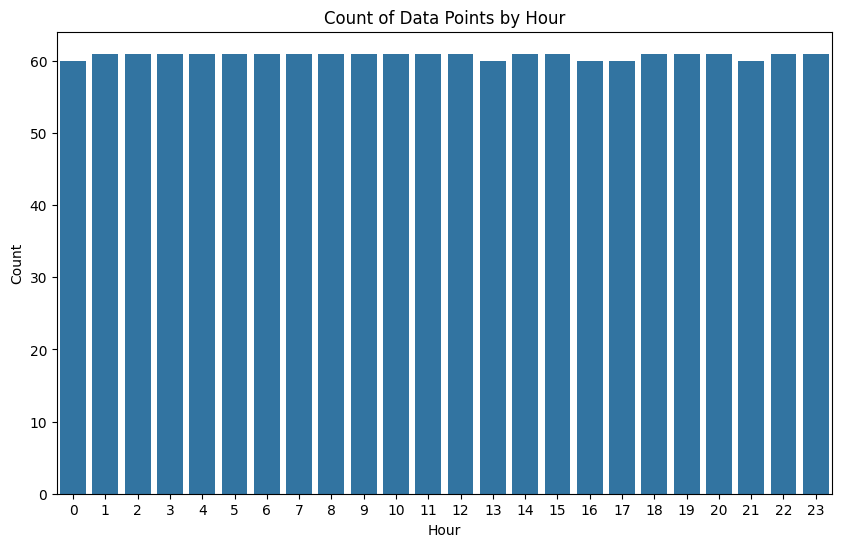

In [20]:
# 시간대별 데이터 분포를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 시각화 (x축을 hour로 설정하여 자동으로 빈도 계산)
sns.countplot(data=train_df, x='hour')

# 차트 제목 및 라벨 추가
plt.title('Count of Data Points by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')

# 그래프 표시
plt.show()

In [26]:
train_df['temperature'].describe()

count    1457.000000
mean       16.717433
std         5.239150
min         3.100000
25%        12.800000
50%        16.600000
75%        20.100000
max        30.000000
Name: temperature, dtype: float64

In [ ]:
# 데이터중에 비가 온 시간대 VS 비가 오지 않은 시간대 데이터의 비율이 어떻게 되는가 ? 
train_df['precipitation'].value_counts()

precipitation
0.0    1411
1.0      46
Name: count, dtype: int64

In [ ]:
# 위에 코드를 비율로 바꿔주는 코드
# 비가 오지 않은 비율 96.8%, 비가 오는 비율 3.1%
precipitation_ratio = train_df['precipitation'].value_counts(normalize=True)
print(precipitation_ratio)

precipitation
0.0    0.968428
1.0    0.031572
Name: proportion, dtype: float64


In [29]:
train_df.columns

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [ ]:
# 0 ~ 8
train_df['windspeed'].describe()

count    1450.000000
mean        2.479034
std         1.378265
min         0.000000
25%         1.400000
50%         2.300000
75%         3.400000
max         8.000000
Name: windspeed, dtype: float64

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1459 non-null   int64  
 1   hour           1459 non-null   int64  
 2   temperature    1457 non-null   float64
 3   precipitation  1457 non-null   float64
 4   windspeed      1450 non-null   float64
 5   humidity       1457 non-null   float64
 6   visibility     1457 non-null   float64
 7   ozone          1383 non-null   float64
 8   pm10           1369 non-null   float64
 9   pm2.5          1342 non-null   float64
 10  count          1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


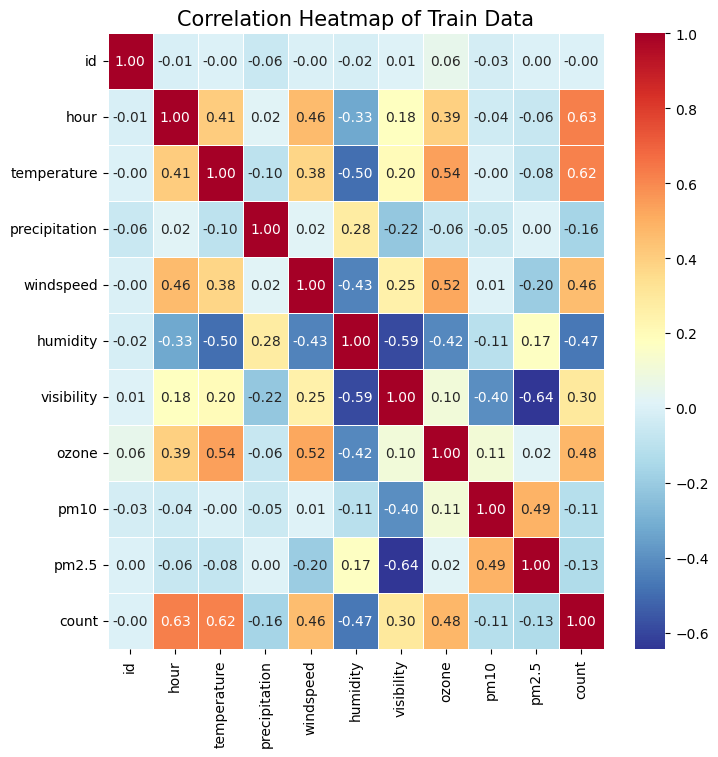

In [34]:
# corr() 상관계수를 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 그래프 크기 설정
plt.figure(figsize=(8, 8))

# 2. 상관관계 계산 및 히트맵 그리기
# annot=True: 각 칸에 수치 표시
# cmap='RdYlBu_r': 빨간색(양의 상관관계) ~ 파란색(음의 상관관계) 컬러맵
# fmt='.2f': 소수점 둘째 자리까지 표시
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlBu_r', fmt='.2f', linewidths=0.5)

# 3. 제목 설정
plt.title('Correlation Heatmap of Train Data', fontsize=15)

# 4. 그래프 출력
plt.show()

In [38]:
# train_df['hour']==20 인 데이터만 골라내기(boolean indexing)
train_df_20 = train_df[train_df['hour']==20]
train_df_20

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
50,84,20,15.6,0.0,3.2,30.0,1211.0,0.060,69.0,58.0,130.0
89,136,20,20.7,0.0,4.1,31.0,2000.0,0.043,40.0,13.0,191.0
102,157,20,11.4,0.0,2.5,85.0,716.0,0.033,38.0,26.0,102.0
112,170,20,16.9,0.0,3.4,63.0,1966.0,0.041,46.0,22.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...
1398,2096,20,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0
1401,2100,20,14.2,0.0,3.6,33.0,2000.0,0.035,42.0,20.0,138.0
1423,2131,20,19.6,0.0,1.7,66.0,1142.0,0.053,54.0,33.0,171.0
1434,2152,20,14.0,0.0,4.3,44.0,2000.0,0.043,48.0,19.0,150.0


In [40]:
train_df.columns

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [44]:
sorted(train_df['humidity'].unique())
#train_df['humidity'].describe()

[np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(30.0),
 np.float64(31.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(34.0),
 np.float64(35.0),
 np.float64(36.0),
 np.float64(37.0),
 np.float64(38.0),
 np.float64(39.0),
 np.float64(40.0),
 np.float64(41.0),
 np.float64(42.0),
 np.float64(43.0),
 np.float64(44.0),
 np.float64(45.0),
 np.float64(46.0),
 np.float64(47.0),
 np.float64(48.0),
 np.float64(49.0),
 np.float64(50.0),
 np.float64(51.0),
 np.float64(52.0),
 np.float64(53.0),
 np.float64(54.0),
 np.float64(55.0),
 np.float64(56.0),
 np.float64(57.0),
 np.float64(58.0),
 np.float64(59.

In [ ]:
# 한국은 m, km로 나타내는데 m로 추정
train_df['visibility'].describe()

count    1457.000000
mean     1405.216884
std       583.131708
min        78.000000
25%       879.000000
50%      1577.000000
75%      1994.000000
max      2000.000000
Name: visibility, dtype: float64

In [46]:
train_df.columns

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [48]:
train_df['ozone'].describe()

count    1383.000000
mean        0.039149
std         0.019509
min         0.003000
25%         0.025500
50%         0.039000
75%         0.052000
max         0.125000
Name: ozone, dtype: float64

In [49]:
train_df['pm10'].describe()

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: pm10, dtype: float64

In [50]:
train_df['pm2.5'].describe()

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: pm2.5, dtype: float64

In [51]:
train_df['count'].describe()

count    1459.000000
mean      108.563400
std        82.631733
min         1.000000
25%        37.000000
50%        96.000000
75%       150.000000
max       431.000000
Name: count, dtype: float64

In [53]:
# train_df['count']==1 떄의 boolearn indexing
train_df[train_df['count']==1]

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
306,476,19,10.8,1.0,3.9,92.0,250.0,0.032,34.0,28.0,1.0
583,894,14,14.4,1.0,3.5,79.0,1395.0,0.039,41.0,28.0,1.0
666,1018,5,10.8,0.0,3.3,98.0,91.0,0.036,32.0,24.0,1.0
814,1235,20,10.8,1.0,3.0,94.0,152.0,0.030,34.0,33.0,1.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1231,1859,23,11.4,1.0,1.8,98.0,128.0,0.024,21.0,NaN,1.0
1272,1924,14,13.8,1.0,4.8,74.0,1955.0,0.044,33.0,23.0,1.0
